# Notebook to look at phase of b1 firing

## Imports

In [35]:
import os 
import glob
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from matplotlib import rcParams
from mosquito.process_abf import load_processed_data, cluster_spikes

## Load data

In [36]:
# load data file
data_folder = 39 
axo_num = 2  # 4

data = load_processed_data(data_folder, axo_num)


In [37]:
# read out data fields
t = data['time']
emg = data['emg']
wbf = data['wbf']
spike_idx = data['spike_idx']
spikes = data['spikes']
spike_t = data['spike_t']
mic_phase = data['mic_phase']


## Look at spikes

Text(0, 0.5, 'emg (V)')

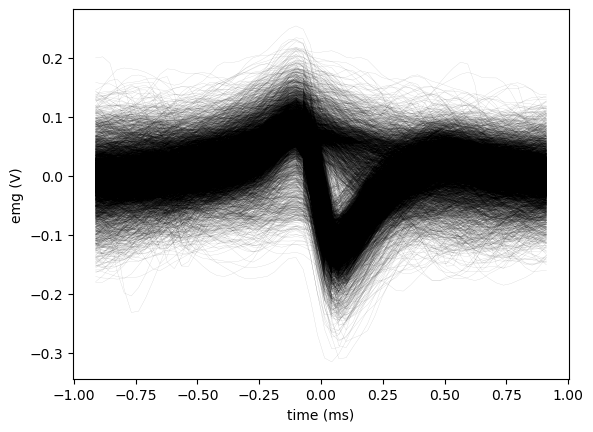

In [38]:
# quick visualization of spikes
fig, ax = plt.subplots()

for spike in spikes:
    ax.plot(1000*spike_t, spike, 'k-', alpha=0.2, lw=0.2)

ax.set_xlabel('time (ms)')
ax.set_ylabel('emg (V)')


## Need to sort out real spikes from noise

For n_clusters = 2 The average silhouette_score is : 0.5091449306917943
For n_clusters = 3 The average silhouette_score is : 0.40613464779421116
For n_clusters = 4 The average silhouette_score is : 0.40313106773972923
For n_clusters = 5 The average silhouette_score is : 0.35311632786841857
For n_clusters = 6 The average silhouette_score is : 0.35036194196631704
For n_clusters = 7 The average silhouette_score is : 0.13321364136275385
For n_clusters = 8 The average silhouette_score is : 0.26888342844531393


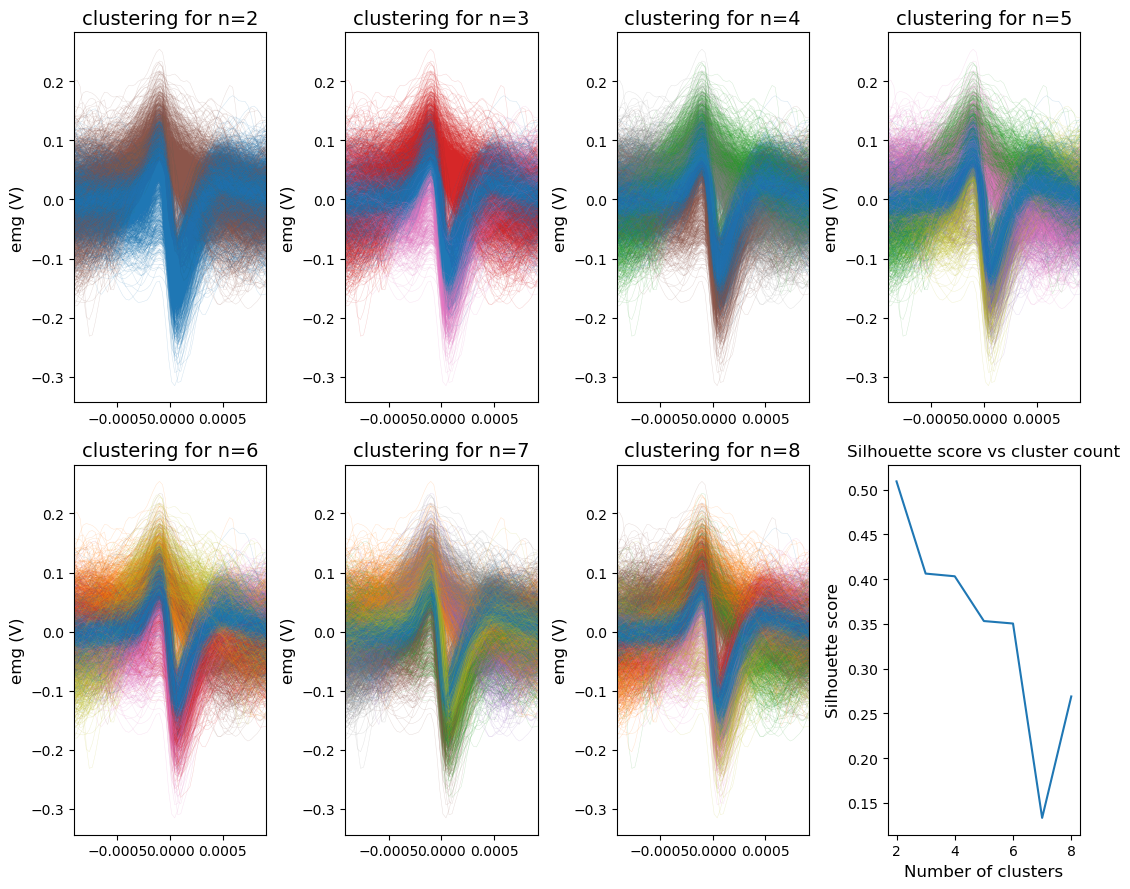

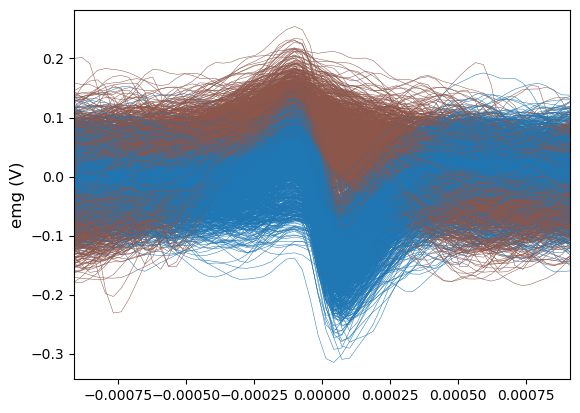

In [39]:
# use spike clustering function 
cluster_labels = cluster_spikes(spikes, spike_t=spike_t, viz_flag=True)


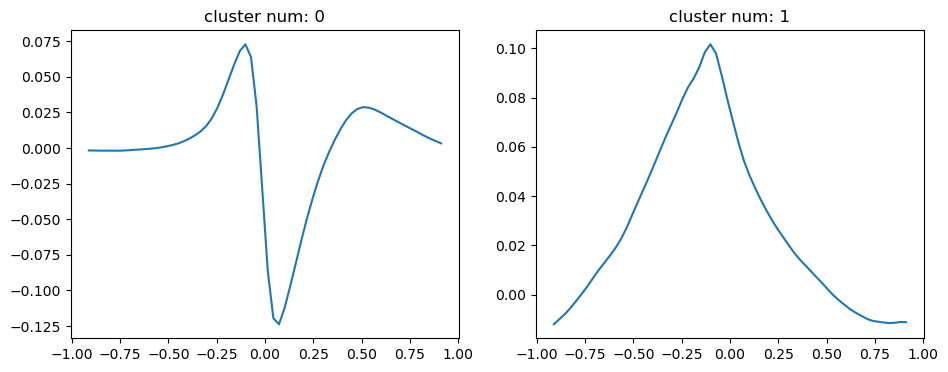

In [40]:
# looks like clustering into 2 groups does the trick. check which number is which and grab the right cluster
cluster_nums = np.unique(cluster_labels)
spike_array = np.vstack(spikes)

fig, ax_list = plt.subplots(1, cluster_nums.size, figsize=(11, 4))
ax_list = ax_list.ravel()

for ith, cnum in enumerate(cluster_nums):
    clust_idx = (cluster_labels == cnum)
    cluster_mean = np.mean(spike_array[clust_idx, :], axis=0)
    
    ax_list[ith].plot(1000*spike_t, cluster_mean)
    ax_list[ith].set_title(f'cluster num: {cnum}')
    

In [41]:
# in my case, cluster 0 is the right one, but this will vary. take only these values
good_cluster = 0
spikes = spikes[cluster_labels == good_cluster]
spike_idx = spike_idx[cluster_labels == good_cluster] 


Text(0, 0.5, 'emg (V)')

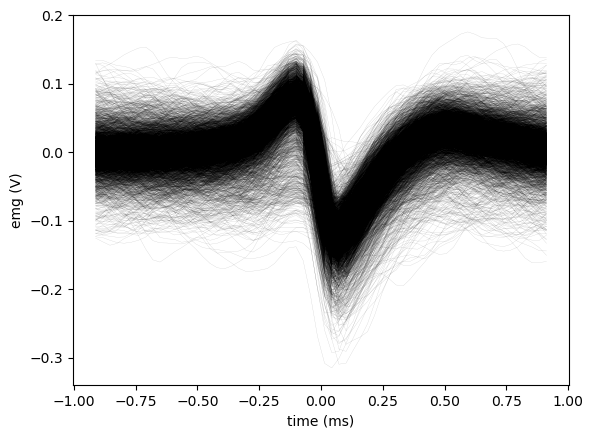

In [42]:
# check that we did that right with a quick visualization of spikes
fig, ax = plt.subplots()

for spike in spikes:
    ax.plot(1000*spike_t, spike, 'k-', alpha=0.2, lw=0.2)

ax.set_xlabel('time (ms)')
ax.set_ylabel('emg (V)')


## Incorporate mic phase

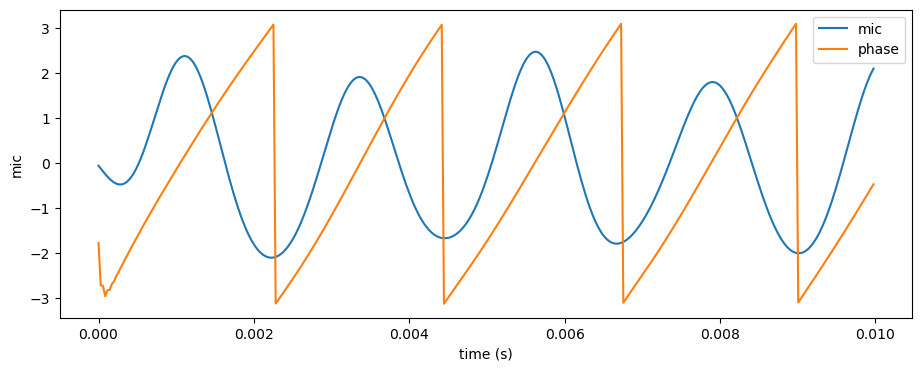

In [43]:
# look at mic data
fig, ax = plt.subplots(figsize=(11,4))

tmin = 0
tmax = 0.01
mask = (t >= tmin) & (t <= tmax)

ax.plot(t[mask], data['mic_filt'][mask], label='mic')
ax.plot(t[mask], mic_phase[mask], label='phase')
# ax.plot( mic_phase[mask], data['mic_filt'][mask])

ax.set_xlabel('time (s)')
ax.set_ylabel('mic')
plt.legend()

Text(0, 0.5, 'pdf')

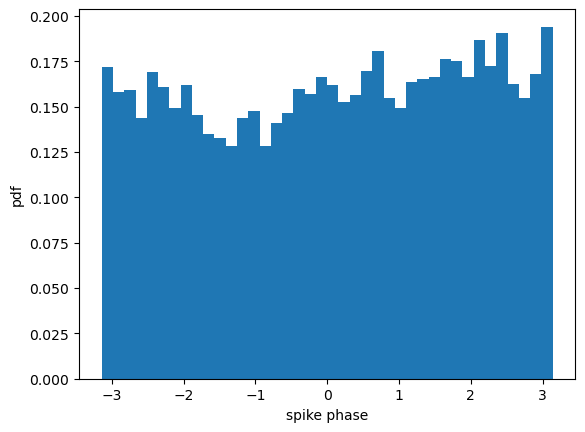

In [44]:
# pull out mic phase at spike times
mic_phase_at_spike = mic_phase[spike_idx]

# visualize with histogram
fig, ax = plt.subplots()

ax.hist(mic_phase_at_spike, bins=40, density=True)

ax.set_xlabel('spike phase')
ax.set_ylabel('pdf')


In [31]:
# fig, (ax1, ax2) = plt.subplots(2,1,figsize=(11,4))

# ax1.plot(t, wbf)
# ax2.plot(t, data['spike_rate'])